<a id=top-page></a>
# `pykitPIV` demo: Upload an external flow field generated with synthetic turbulence

In this Jupyter notebook, we are going to generate a velocity field using the [synthetic turbulence generator](https://turbulence.utah.edu/) and upload it into the ``FlowField`` class.

We use the von Karman-Pao spectrum to generate an isotropic synthetic turbulent velocity field.



<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#generate-particles">Generate particles</a></li>
    <li><a href="#upload-velocity-field">Upload flow field generated with synthetic turbulence</a></li>
    <li><a href="#add-movement">Add movement to particles</a></li>
        <ul>
        <li><a href="#add-movement-visualize">Visualize the PIV image pair</a></li>
        </ul>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import numpy as np
import pandas as pd
import cmcrameri.cm as cmc
from pykitPIV import Particle, FlowField, Motion, Image

2025-05-23 14:04:50.828333: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
save_images = False
filename = None

In [3]:
n_images = 4
image_size = (124,124)
size_buffer = 2
figsize = (5,4)

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [4]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(2,3),
                     distances=(1,2),
                     densities=(0.4,0.41),
                     diameter_std=0.5,
                     seeding_mode='random', 
                     random_seed=100)

In [5]:
image = Image(random_seed=100)

In [6]:
image.add_particles(particles)

<a id=upload-velocity-field></a>
***

## Upload flow field generated with synthetic turbulence

[Go to the top](#top-page)

In [7]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer, 
                      time_separation=1)

In [8]:
grid_size = 128
n_modes = 100

In [9]:
u_df = pd.read_csv('../docs/data/u_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()
v_df = pd.read_csv('../docs/data/v_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()
w_df = pd.read_csv('../docs/data/w_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()

u_tensor = np.reshape(u_df, (grid_size,grid_size,grid_size))
v_tensor = np.reshape(v_df, (grid_size,grid_size,grid_size))
w_tensor = np.reshape(w_df, (grid_size,grid_size,grid_size))

In [10]:
synth_turb_gen_velocity_field = np.zeros((1,2,128,128))
synth_turb_gen_velocity_field[0,0,:,:] = u_tensor[:,:,0]
synth_turb_gen_velocity_field[0,1,:,:] = v_tensor[:,:,0]

In [11]:
flowfield.upload_velocity_field(synth_turb_gen_velocity_field)

The same velocity field will be applied to all PIV image pairs.


We set the appropriate time separation between image frames:

In [12]:
flowfield.time_separation = 2

In [13]:
image.add_flowfield(flowfield)

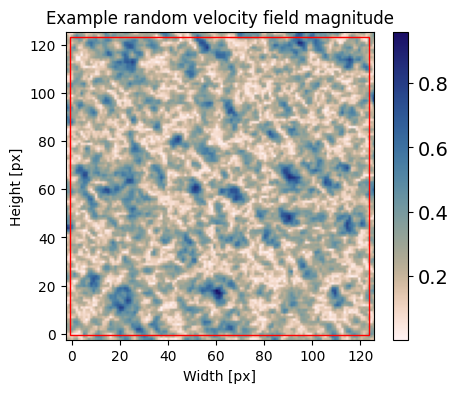

In [14]:
if save_images: filename = 'synthetic-turbulence-demo-velocity-field-magnitude.png'
image.plot_field_magnitude(0,
                            with_buffer=True,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Example random velocity field magnitude',
                            cmap=cmc.lapaz_r,
                            figsize=figsize, 
                            filename=filename);

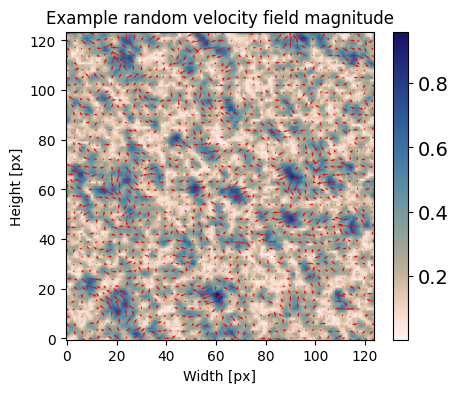

In [15]:
if save_images: filename = 'synthetic-turbulence-demo-velocity-field-magnitude-quiver.png'
image.plot_field_magnitude(0,
                            with_buffer=False,
                            add_quiver=True,
                            quiver_step=3,
                            quiver_color='r',
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Example random velocity field magnitude',
                            cmap=cmc.lapaz_r,
                            figsize=figsize,
                            filename=filename);

<a id=add-movement></a>
***

## Add movement to particles

[Go to the top](#top-page)

In [16]:
motion = Motion(particles, 
                flowfield)

In [17]:
motion.runge_kutta_4th(n_steps=20)

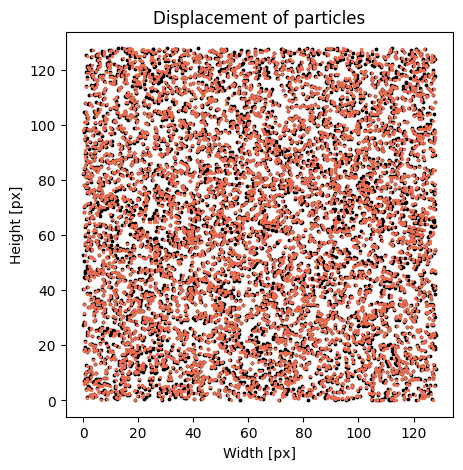

In [18]:
if save_images: filename = 'synthetic-turbulence-demo-displacement.png'
motion.plot_particle_motion(0,
                            s=3,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=(5,5),
                            filename=filename);

<a id=add-movement-visualize></a>

### Visualize the PIV image pair

[Go to the top](#top-page)

In [19]:
image.add_motion(motion)

In [20]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/10)

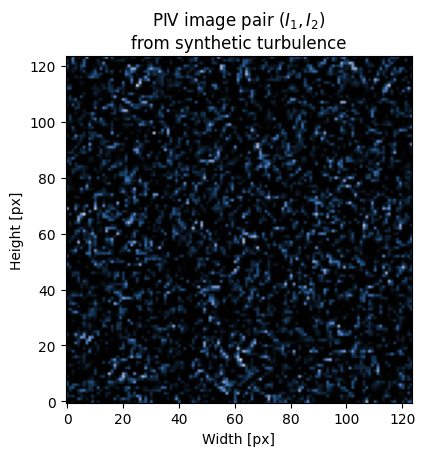

In [21]:
if save_images: filename = 'synthetic-turbulence-demo-PIV-image-I1-I2.png'
image.plot_image_pair(0,
                      with_buffer=False, 
                      xlabel='Width [px]',
                      ylabel='Height [px]',
                      title='PIV image pair $(I_1, I_2)$\nfrom synthetic turbulence',
                      cmap=cmc.oslo,
                      figsize=(6,4.5), 
                      dpi=600,
                      filename=filename);

***

© K. Zdybał, C. Mucignat, S. Kunz, I. Lunati (2025)